# Исследование объявлений о продаже квартир


## Описание проекта:

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Цель исследования:

- Определить рыночную стоимость объектов недвижимости разного типа.
- Построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность.
- Установить какие вакторы влияют на ценообразование стоимости квартир.


## Ход исследования:

Данные о недвижимости я получу из файла .О качестве данных ничего не известно. Поэтому перед тем, как приступать к целям исследования, понадобится обзор данных.

Я проверю данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработки я поищу возможность исправить все ошибки данных, которые не приведутк искажению конечного результата. Далее, создадим необходимые столбцы, и приступлю к проведению исследовательского анализа.

Таким образом мое исследование пройдет в 7 этапов:
- Обзор данных.
- Предобработка данных.
- Расчеты т добавление результатов.
- Проведение анализа для Ленинградской области.
- Прооведение анализа для Санкт-Петербурга.
- Различаются ли факторы, которые влияют на ценообразование стоимости квартир.
- Вывод.

### Откройте файл с данными и изучите общую информацию. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

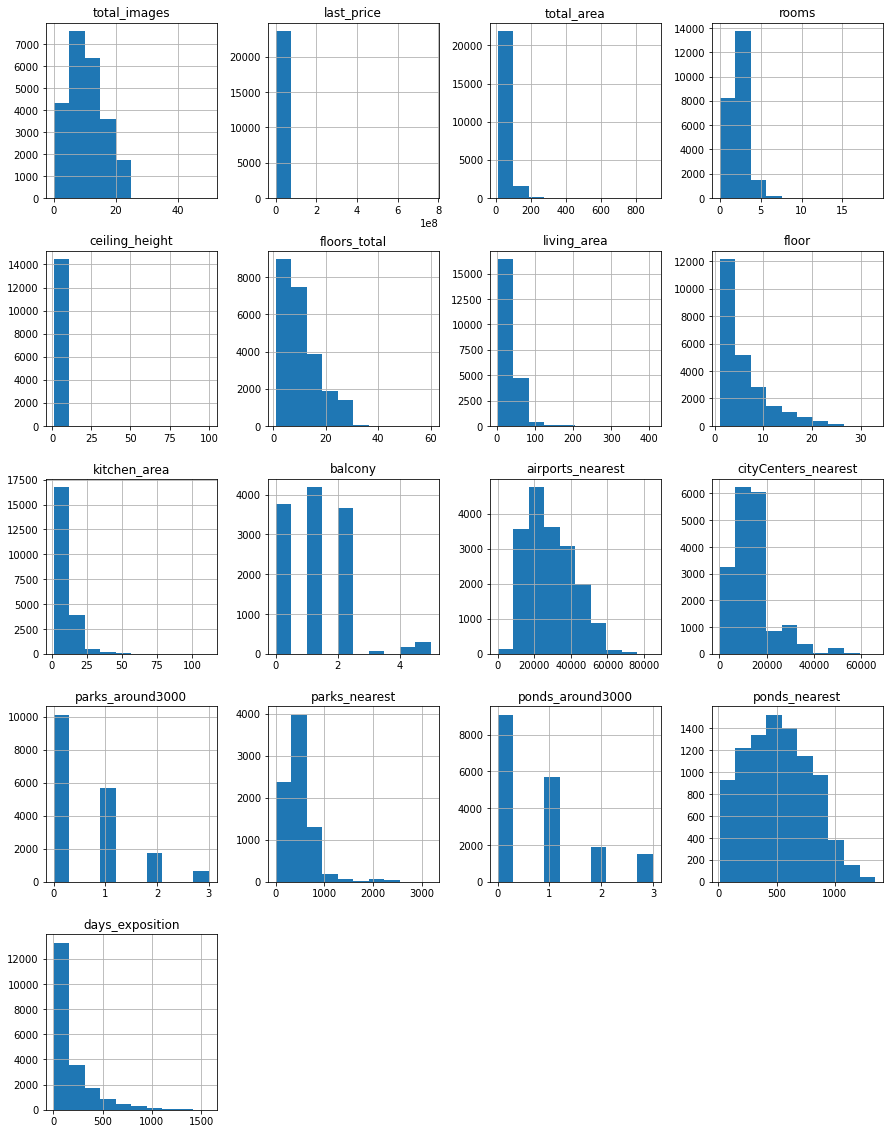

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv',sep ='\t')
data.info()
data.hist(figsize=(15, 20))
plt.show()

В first_day_exposition необходимо заменить тип данных на дату.В is_apartment на bool. Большое количество данных равно нулю. Нужно проверить данные на пропуски.

### Предобработка данных

In [2]:
#Узнаем в каких столбцах пропущены данные
data.isnull().any()
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


In [3]:
print(data['is_apartment'].unique())


[nan False True]


В столбце is_apartment есть nan,False и True. Скорее всего нет  данных, так как помещение не является аппартаментом. И все пропущенные значения nan логично заменить на False и заменим тип столбца на bool.

In [4]:
data['is_apartment'] = data['is_apartment'].fillna(0)
data['is_apartment'] = data['is_apartment'].astype('bool')

Продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0. Число балконов является целым числом, а в таблице вещественное. Заменим на целое.

In [5]:
print(data['balcony'].unique())
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')

[nan  2.  0.  1.  5.  4.  3.]


Заменим тип данных столбца first_day_exposition на datetime  без времени. Также в столбце days_exposition заменим пропуски мединное значение и изменим тип данных. 

In [6]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())
data['days_exposition'] = data['days_exposition'].astype('int')

Рассмотрим пропущенные значения в floors_total.Ничего общего между ними нет. Пропущено 0.4% значений. Что не так много и можно от них избавиться. Значение этажности дома целочисленное значение.

In [7]:
print(data[data['floors_total'].isna()])
print(len(data[data['floors_total'].isna()])/len(data['floors_total']))
data.dropna(subset=['floors_total'], inplace=True)
data['floors_total'] = data['floors_total'].astype(int)

       total_images  last_price  total_area first_day_exposition  rooms  \
186              12  11640000.0        65.2           2018-10-02      2   
237               4   2438033.0        28.1           2016-11-23      1   
457               4   9788348.0        70.8           2015-08-01      2   
671               4   6051191.0        93.6           2017-04-06      3   
1757              5   3600000.0        39.0           2017-04-22      1   
...             ...         ...         ...                  ...    ...   
22542             5   8500000.0        63.5           2017-05-24      2   
22656             4   4574160.0        64.5           2017-04-02      2   
22808             0  14569263.0       110.4           2016-11-20      3   
23590             0  21187872.0       123.3           2017-04-25      3   
23658             6   3063600.0        43.8           2016-11-28      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
186               NaN

Не указыны число парков и число водоемов в радиусе 3м. Оставим их неизменными, так как они не пригодятся для анализа.

Рассмотрим значения в locality_name. Пропущено 0,2% значений. Значение минмальное можно избавиться от этих значений. Причина пропущенных данных не известнаю. Либо пользователь не указал данные,либо они искаженны. Откроем уникальные значения столбца, видим неявные дубликаты. Исправим их.  

In [8]:
print(len(data[data['locality_name'].isna()])/len(data['locality_name']))
data.dropna(subset=['locality_name'], inplace=True)
print(data['locality_name'].nunique())
data['locality_name'] = data['locality_name'].replace(to_replace='посёлок', value='поселок', regex=True)
data['locality_name'] = data['locality_name'].replace(to_replace=['поселок городского типа','городской поселок'], value='поселок', regex=True)
print(data['locality_name'].unique())

0.002032778554186253
364
['Санкт-Петербург' 'поселок Шушары' 'поселок Янино-1' 'поселок Парголово'
 'поселок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф' 'Пушкин'
 'деревня Кудрово' 'Коммунар' 'Колпино' 'поселок Красный Бор' 'Гатчина'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'поселок Металлострой' 'поселок Лебяжье'
 'поселок Сиверский' 'поселок Молодцово' 'поселок Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'поселок Аннино' 'поселок Ефимовский'
 'поселок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'поселок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'поселок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'деревня Оржицы' 'деревня Кальтино'
 'Кудрово' 'поселок Романовка' 'поселок Бугры' 'поселок Рощино' 'К

В таблице ceiling_height пропущено 39% значений. Также есть аномальные значения 32,24 и т.д. Может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Оставим значения в диапазоне [2,4;5,5].Так как минимальная высота потолка 2,4м, а максимальная - 5,5м. В пропущенных значениях заменим значения на среднее число. Все остальные значения удалим.

In [9]:
print(len(data[data['ceiling_height'].isna()])/len(data['ceiling_height']))
print(data['ceiling_height'].unique())
for i in data['ceiling_height'].index:
    data.loc[data['ceiling_height'] > 5.5,'ceiling_height'] = data['ceiling_height']/10
data['ceiling_height'] = data['ceiling_height'].fillna(round(data['ceiling_height'].mean(),2))
data = data.query('ceiling_height >=2.4 and ceiling_height <=5.5')

0.3854869509866327
[  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53
   2.74   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82
   3.54   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9
   3.18   3.35   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83
   3.52   3.95   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19
   3.24   4.8    4.5    4.2    3.36  32.     3.08   3.68   3.07   3.37
   3.09   8.     3.26   3.34   2.81   3.44   2.97   3.14   4.37   2.68
   3.22   3.27  27.     4.1    2.93   3.46  24.     3.47   3.33   3.63
   3.32  26.     1.2    8.3    2.98   2.86   3.17   4.4    3.28

В таблицах living_area и kitchen_area пропущено около 10%. Заменим из на примерное значение,зная плрщадь всего живого помещения. А в parks_nearest,ponds_nearest,airports_nearest и cityCenters_nearest 61%, 66%, 23% и 23% соответсвенно. Причина сокрытие данных или их искажение. 

In [10]:
print(len(data[data['living_area'].isna()])/len(data['living_area']))
print(len(data[data['kitchen_area'].isna()])/len(data['kitchen_area']))
data['living_area'].fillna(data['living_area'].mean() / data['total_area'].mean() * data['total_area'], inplace=True)
data['kitchen_area'].fillna(data['kitchen_area'].mean() / data['total_area'].mean() * data['total_area'], inplace=True)
print(len(data[data['parks_nearest'].isna()])/len(data['parks_nearest']))
print(len(data[data['ponds_nearest'].isna()])/len(data['ponds_nearest']))
print(len(data[data['airports_nearest'].isna()])/len(data['airports_nearest']))
print(len(data[data['cityCenters_nearest'].isna()])/len(data['cityCenters_nearest']))

0.07908380078191399
0.09412714601393847
0.6592299847016828
0.6164796872344042
0.23406425293217745
0.233086860445351


Слишком большое количество пропущенных значений в parks_nearest,airports_nearest и cityCenters_nearest. А ponds_nearest оставим неизменными, так как данные не будут использоваться.
Сгруппируем данные по геолокации и заменим пропущенные значения на мединное значение сгруппированных по местоположении данных.

In [11]:
#расстояние до ближайшего парка
parks_nearest_medians = data.pivot_table(index='locality_name', values='parks_nearest', aggfunc=['median', 'count'])
parks_nearest_medians.columns = ['median', 'count']
print(parks_nearest_medians)


for name in parks_nearest_medians.index:
    data.loc[(data['locality_name'].isna()) | 
             ((data['locality_name'] == name) & (parks_nearest_medians.loc[name, 'count'] == 0)), 
             'parks_nearest'] = data['parks_nearest'].describe()[5]
    
for name in parks_nearest_medians.index:
    data.loc[(data['parks_nearest'].isna()) & 
             (data['locality_name'] == name), 
             'parks_nearest'] = parks_nearest_medians.loc[name, 'median']
    


                      median  count
locality_name                      
Зеленогорск            147.5     16
Колпино                393.0    133
Красное Село           435.0     45
Кронштадт              293.0     87
Ломоносов              407.0     16
...                      ...    ...
село Путилово            NaN      0
село Рождествено         NaN      0
село Русско-Высоцкое     NaN      0
село Старая Ладога       NaN      0
село Шум                 NaN      0

[322 rows x 2 columns]


In [12]:
#расстояние до ближайшего аэропорта
airports_nearest_medians = data.pivot_table(index='locality_name', values='airports_nearest', aggfunc=['median', 'count'])
airports_nearest_medians.columns = ['median', 'count']
print(airports_nearest_medians)


for name in airports_nearest_medians.index:
    data.loc[(data['locality_name'].isna()) | 
             ((data['locality_name'] == name) & (airports_nearest_medians.loc[name, 'count'] == 0)), 
             'airports_nearest'] = data['airports_nearest'].describe()[5]
    
for name in airports_nearest_medians.index:
    data.loc[(data['airports_nearest'].isna()) & 
             (data['locality_name'] == name), 
             'airports_nearest'] = airports_nearest_medians.loc[name, 'median']
    


                       median  count
locality_name                       
Зеленогорск           72282.0     24
Колпино               26232.0    337
Красное Село          25730.0    173
Кронштадт             67850.0     95
Ломоносов             48415.5    132
...                       ...    ...
село Путилово             NaN      0
село Рождествено          NaN      0
село Русско-Высоцкое      NaN      0
село Старая Ладога        NaN      0
село Шум                  NaN      0

[322 rows x 2 columns]


In [13]:
#расстояние до центра
cityCenters_nearest_medians = data.pivot_table(index='locality_name', values='cityCenters_nearest', aggfunc=['median', 'count'])
cityCenters_nearest_medians.columns = ['median', 'count']
print(parks_nearest_medians)


for name in cityCenters_nearest_medians.index:
    data.loc[(data['locality_name'].isna()) | 
             ((data['locality_name'] == name) & (cityCenters_nearest_medians.loc[name, 'count'] == 0)), 
             'cityCenters_nearest'] = data['cityCenters_nearest'].describe()[5]
    
for name in cityCenters_nearest_medians.index:
    data.loc[(data['cityCenters_nearest'].isna()) & 
             (data['locality_name'] == name), 
             'cityCenters_nearest'] = cityCenters_nearest_medians.loc[name, 'median']
    


                      median  count
locality_name                      
Зеленогорск            147.5     16
Колпино                393.0    133
Красное Село           435.0     45
Кронштадт              293.0     87
Ломоносов              407.0     16
...                      ...    ...
село Путилово            NaN      0
село Рождествено         NaN      0
село Русско-Высоцкое     NaN      0
село Старая Ладога       NaN      0
село Шум                 NaN      0

[322 rows x 2 columns]


Для наглядности результата изменим тип данных столбца last_price

In [14]:
data['last_price'] = data['last_price'].astype('int')

Проверим все ли заменили пропуски.

In [15]:
print(data.isnull().any())

total_images            False
last_price              False
total_area              False
first_day_exposition    False
rooms                   False
ceiling_height          False
floors_total            False
living_area             False
floor                   False
is_apartment            False
studio                  False
open_plan               False
kitchen_area            False
balcony                 False
locality_name           False
airports_nearest        False
cityCenters_nearest     False
parks_around3000         True
parks_nearest           False
ponds_around3000         True
ponds_nearest            True
days_exposition         False
dtype: bool


Ранее мы проверили данные на неявные дубликаты. Сейчас проверим на явные:

In [16]:
print(data.duplicated().sum())

0


Мы изучили данные,нашли данные с неявными дубликатами, замеинили пропуски и сменили тип данных.

### Посчитайте и добавьте в таблицу новые столбцы

Рассчитаем цену одного квадратного метра и изменим тип на целочисленный для наглядностии результата:

In [17]:
data['price_per_square_meter'] = data['last_price']/data['total_area']
data['price_per_square_meter'] = data['price_per_square_meter'].astype('int')

День публикации объявления, месяц публикации объявления,год публикации объявления:

In [18]:
data['day'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

Тип этажа квартиры (значения — «первый», «последний», «другой»);
Расстояние до центра города в километрах.

In [19]:
def floors_t(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] ==row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['type_floor'] = data.apply(floors_t, axis =1)
data['distance_to_the_city_center_km'] = round(data['cityCenters_nearest']/1000,0)

Выведем значения таблицы для проверки добавления столбцов:

In [20]:
print(data.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000       108.0           2019-03-07      3   
1             7     3350000        40.4           2018-12-04      1   
2            10     5196000        56.0           2015-08-20      2   
3             0    64900000       159.0           2015-07-24      3   
4             2    10000000       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70            16     51.00000      8         False  ...   
1            2.72            11     18.60000      1         False  ...   
2            2.72             5     34.30000      4         False  ...   
3            2.72            14     90.82389      9         False  ...   
4            3.03            14     32.00000     13         False  ...   

   parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
0          482.0               2.0          755.0         

### Проведите исследовательский анализ данных

Построим гистограммы:

Макисмальная площадь продаваемой квартиры 900 м^2, а минимальная - 12 м^2. Большинство квартир площадью менее 100 м^2. Также присутствуют значения более 100 м^2, что являются аномальными.Средняя площадь 52 м^2.

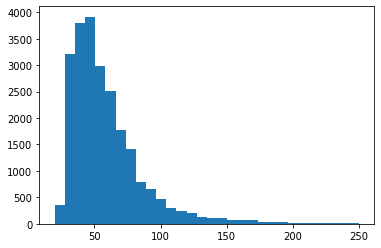

count    23532.000000
mean        60.317326
std         35.597070
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

In [21]:
#общая площадь
plt.hist(data['total_area'],bins = 30,range =(20,250))
plt.show()
data['total_area'].describe()

Максимальная жилая площадь - 410, а минимальная - 2. Средняя площадь - 30 м^2.

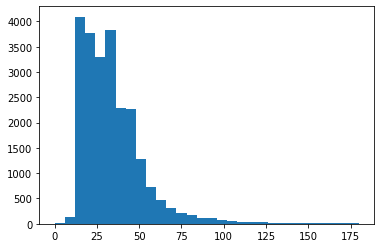

count    23532.000000
mean        34.585535
std         22.335327
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

In [22]:
#жилая площадь
plt.hist(data['living_area'],bins = 30,range = (0,180))
plt.show()
data['living_area'].describe()

Максимальная площадь кухни 112 м^2, минимальная - 1.3 м^2. Средння площадь кухни - 9 м^2

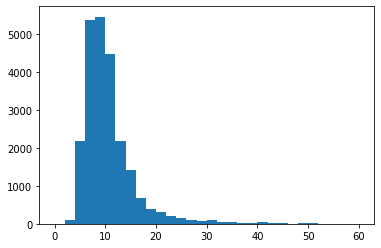

count    23532.000000
mean        10.500447
std          6.028493
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [23]:
#площадь кухни
plt.hist(data['kitchen_area'],bins = 30,range =(0,60))
plt.show()
data['kitchen_area'].describe()

Максимальная цена за квартиру в Санкт-Петербурге 763000000 руб..А минимальная - 12190 руб. Средняя цена - 4650000 руб.

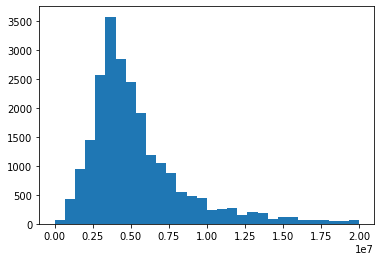

count    2.353200e+04
mean     6.536149e+06
std      1.088748e+07
min      1.219000e+04
25%      3.405750e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [24]:
#цена объекта
plt.hist(data['last_price'],bins = 30,range = (10000,20000000))
plt.show()
data['last_price'].describe()

Большинство квартир имеют 1-2 комнат.Есть Аномальные значения больше 6 комнат. 

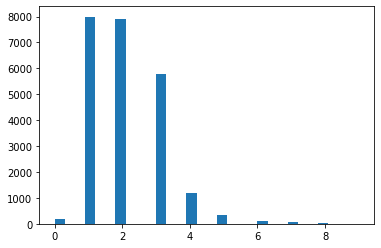

count    23532.000000
mean         2.070797
std          1.078612
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [25]:
#количество комнат
plt.hist(data['rooms'],bins = 30,range =(0,9))
plt.show()
data['rooms'].describe()

Средняя высота потолка квартир в Питере - 2.72. 

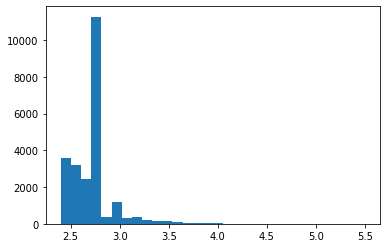

count    23532.000000
mean         2.724020
std          0.214889
min          2.400000
25%          2.600000
50%          2.720000
75%          2.720000
max          5.500000
Name: ceiling_height, dtype: float64

In [26]:
#высота потолков
plt.hist(data['ceiling_height'],bins = 30)
plt.show()
data['ceiling_height'].describe()

Чаще всего квартиры находтся на 4-6 этаже.

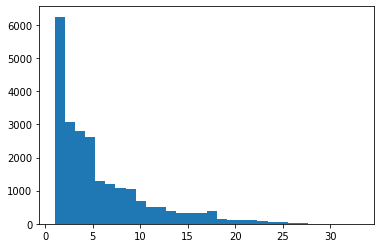

count    23532.000000
mean         5.878718
std          4.872423
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [27]:
#этаж квартиры
plt.hist(data['floor'],bins = 30)
plt.show()
data['floor'].describe()

Как было выяснено ранне квариры находтся чаще всего на 4-6 этаже, что не являются не первым и не последним этажом.

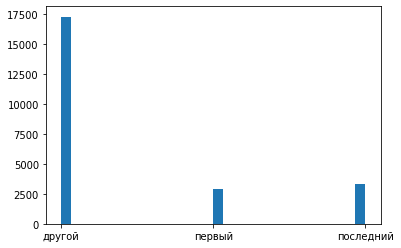

count      23532
unique         3
top       другой
freq       17307
Name: type_floor, dtype: object

In [28]:
#тип этажа квартиры («первый», «последний», «другой»)
plt.hist(data['type_floor'],bins = 30)
plt.show()
data['type_floor'].describe()

Дома в Питере стандартные - 9-ти этажные.

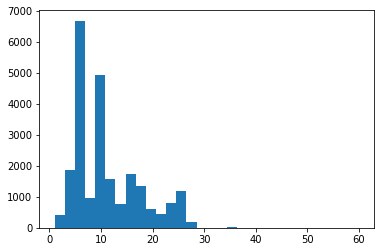

count    23532.000000
mean        10.677800
std          6.593857
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [29]:
#общее количество этажей в доме
plt.hist(data['floors_total'],bins = 30)
plt.show()
data['floors_total'].describe()

Стандартное расстояние до центра города - 13099 м.

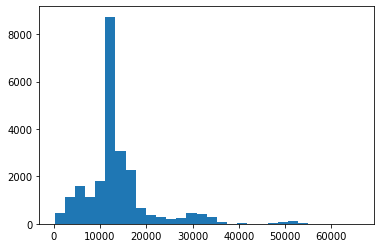

count    23532.000000
mean     13943.813934
std       7570.017678
min        181.000000
25%      10934.000000
50%      13099.000000
75%      15250.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [30]:
#расстояние до центра города в метрах
plt.hist(data['cityCenters_nearest'],bins = 30)
plt.show()
data['cityCenters_nearest'].describe()

Стандартное расстояние до аэропорта - 26756.5 м.

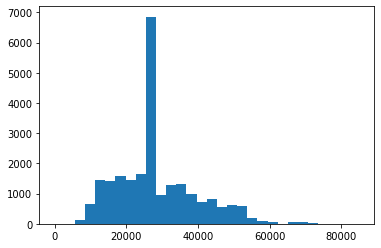

count    23532.000000
mean     28321.584332
std      11096.158673
min          0.000000
25%      21137.000000
50%      26756.500000
75%      34324.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [31]:
#расстояние до ближайшего аэропорта
plt.hist(data['airports_nearest'],bins = 30)
plt.show()
data['airports_nearest'].describe()

Расстояние до ближайшего парка чаще всего - 460 м.

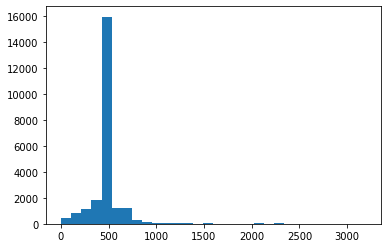

count    23532.000000
mean       470.603072
std        203.240518
min          1.000000
25%        455.000000
50%        460.000000
75%        460.000000
max       3190.000000
Name: parks_nearest, dtype: float64

In [32]:
#расстояние до ближайшего парка
plt.hist(data['parks_nearest'],bins = 30)
plt.show()
data['parks_nearest'].describe()

Объявления квартир появляются чаще всего в будние, так как в это время работают агенства-недвижимости.С февраля по апрель месяц  количество объявлений максимально. 

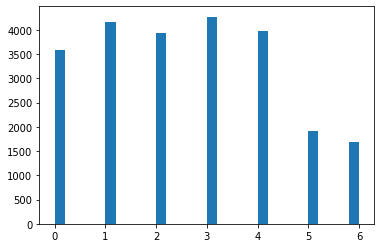

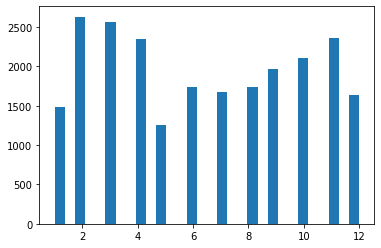

count    23532.000000
mean         6.401581
std          3.493086
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

In [33]:
#день и месяц публикации объявления
plt.hist(data['day'],bins = 30)
plt.show()
data['day'].describe()

plt.hist(data['month'],bins = 30)
plt.show()
data['month'].describe()

Изучим, как быстро продавались квартиры. Продажа квартиры обычно занимает 95 дней. Минимальное количество дней продавалась квартира - 1 день, что очень быстро.А макимальное - 1580, больше 4 лет, что необычно долго.

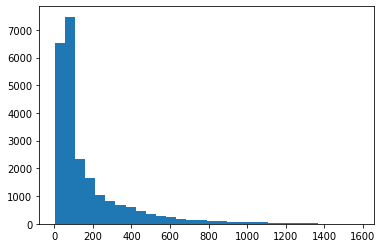

count    23532.000000
mean       169.221911
std        206.552722
min          1.000000
25%         45.000000
50%         95.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [34]:
plt.hist(data['days_exposition'],bins = 30)
plt.show()
data['days_exposition'].describe()

Продажа квартиры в среднем занимает 95 дней.Слишком быстрыми продлажами будем считать квартиры, которые продавались меньше 45 дней, а слишком быстрые - квартиры,которые продавались больше 198 дней.

Какие факторы больше всего влияют на общую (полную) стоимость объекта? 
Корреляция в 0.36,0.59,0,51 и 0.65 говорит о наличии связи, однако не слишком сильной. Выходит, увеличение количества комнат, площади кухни,живой площади и площади квартиры в целом сопровождается ростом в  цене, но так бывает не всегда. Положительный коэффициент корреляции показывает что, когда значения одной переменной возрастают, значения другой переменной также возрастают. 

In [35]:
print(data['kitchen_area'].corr(data['last_price']))
print(data['rooms'].corr(data['last_price']))
print(data['living_area'].corr(data['last_price']))
print(data['total_area'].corr(data['last_price']))

0.5145607525359044
0.36306665545079875
0.5846373210378573
0.6533596354075267


Избавимся от аномальных значений и нарисуем графики зависимостей цены от разных факторов.

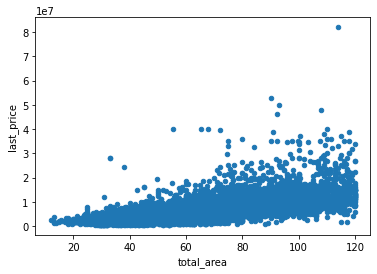

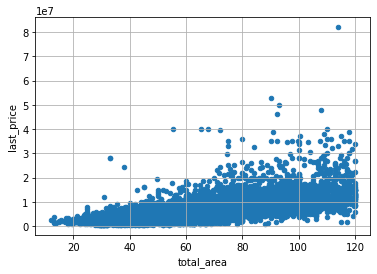

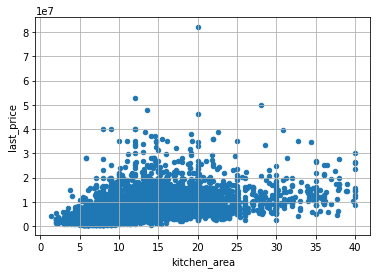

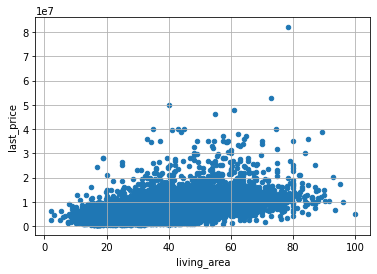

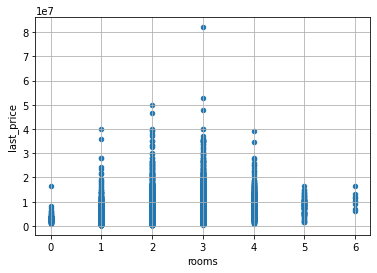

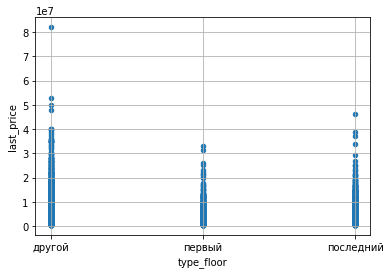

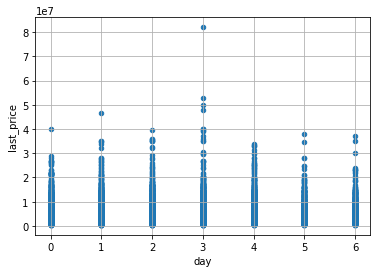

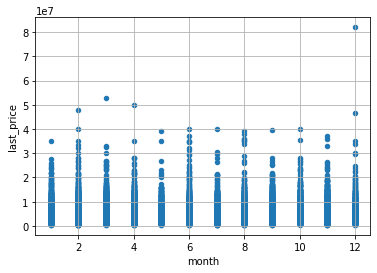

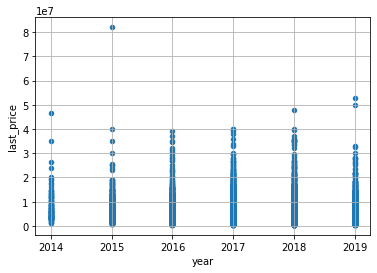

In [36]:
data = data.query('rooms <=6')
data = data.query('total_area <=120')
data = data.query('kitchen_area <= 40')
data = data.query('living_area <= 100')
data.plot.scatter(x='total_area',y ='last_price')
for i in ['total_area','kitchen_area','living_area','rooms','type_floor','day','month','year']:
    data.plot.scatter(x = i,y = 'last_price',grid=True)

Цена квартиры зависит от таких факторов как от площади всей квартиры,от площади жилого помещения,количества комнат,на каком этаже находится квартира.Чем больше число комнат в квартире, тем больше цена. Если квартира расположена на первом этаже,то цена соответсвенно ниже,если на последнем,то  цена чуть выше, чем на первом. Цены на квартиру выше,если квартира ни на первом этаже, ни на последнем. Цена влияет от таких фактарах,как от площади кухни и от даты публикации объявления о продаже квартиры.Например,в декабре цены на квартиры выше,чем в другие месяцы.Плюс нужно учитывать,что по сравнению с 2014 годом цены на квартиру выросли.

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [37]:
max_count = data.pivot_table(index = 'locality_name',values ='price_per_square_meter',aggfunc = ['count','mean'])
max_count.columns = ['count', 'mean']
max_count = max_count.sort_values(by = 'count',ascending =False).head(10)
print(max_count)

                   count           mean
locality_name                          
Санкт-Петербург    14624  110837.667464
поселок Мурино       551   85628.018149
поселок Шушары       437   78565.075515
Всеволожск           394   68738.492386
Пушкин               348  102404.071839
Колпино              336   75369.595238
поселок Парголово    326   90331.840491
Гатчина              304   68919.016447
деревня Кудрово      299   92473.086957
Выборг               230   58328.400000


Самая высокая стоимость жилья в Питере, а самая низкая - в Выборге.

Вычислим среднюю цену каждого километра в Санкт-Петербурге.

                                price_per_square_meter
distance_to_the_city_center_km                        
0.0                                           138536.5
1.0                                           126728.0
2.0                                           123966.0
3.0                                           110013.5
4.0                                           118257.0
5.0                                           126554.0
6.0                                           124588.0
7.0                                           121022.5
8.0                                           120030.0
9.0                                           105537.0
10.0                                          106403.5
11.0                                          103201.0
12.0                                          104404.5
13.0                                          103884.0
14.0                                          101626.0
15.0                                          101162.0
16.0      

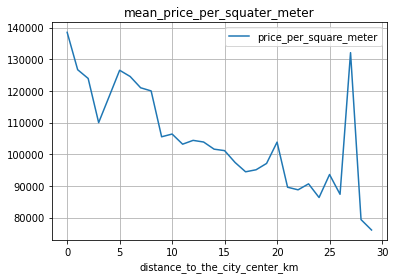

In [38]:
table = data.query('locality_name == "Санкт-Петербург"').pivot_table(index= 'distance_to_the_city_center_km',values = 'price_per_square_meter',aggfunc ='median')
print(table)
print(table.plot(grid = True, title = 'mean_price_per_squater_meter'))

Жить в центре в среднем за один квадратный метр обойдётся в 172619 рублей.

Покупка средней  квартиры в Петербурге размера 52 м^2 c 2 комнатами, с в ысотой потолков 2.72 м,на 4-6 этаже обойдется в 4650000 руб. При этом парк будет находится в среднем в 460 метрах.

### Общий вывод

Вывод:
В нашем распоряжении были данные сервиса Яндекс.Недвижимость.Большиснтво данных то не было вообще,то они были аномальными.Но мы смогли их заменить и посчитать. Посчитали и добавили цену одного квадратного метра,день,месяц, год публикации, тип этажа квартиры и расстояние в км до центра города.В среднем мы можем купить  квартиру в Петербурге с площадью 52 м^2 c 2 комнатами, с высотой потолков 2.72 м,на 4-6 этаже за 4650000 руб. Причем в среднем расстояние до ближайшего парка будет всего 460 м.В среднем квартиры продавались за 95 дней. На стоимость квартиры будут влиять такие факторы как площадь всей квартиры,площадь жилого помещения,количество комнат,на каком этаже находится квартира.Чем больше число комнат в квартире, тем больше цена. Если квартира расположена на первом этаже,то цена соответсвенно ниже,если на последнем,то цена чуть выше, чем на первом. Цены на квартиру выше,если квартира ни на первом этаже, ни на последнем. Самая высокая стоимость жилья в Питере, а самая низкая - в Выборге.Чтобы жить в центре придется раскошелится,отдав в среднем за один квадратный метр 180000 рублей. Конечно же, не нужно забывать,что цены на квартиру выросли по сравнению с 2014 годом.